# Water Quality

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('datasets/water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data.groupby('Potability')['Potability'].count()

Potability
0    1998
1    1278
Name: Potability, dtype: int64

In [7]:
(data.isnull().sum()/data.count())*100 

ph                 17.630162
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            31.302605
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     5.202312
Turbidity           0.000000
Potability          0.000000
dtype: float64

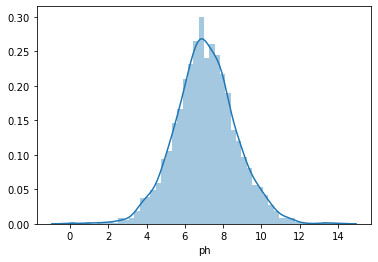

In [8]:
sns.distplot(data['ph'])

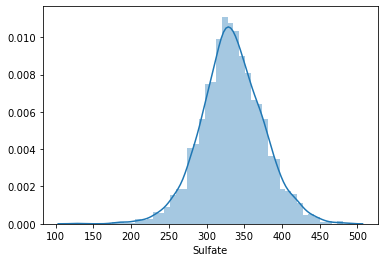

In [9]:
sns.distplot(data['Sulfate'])

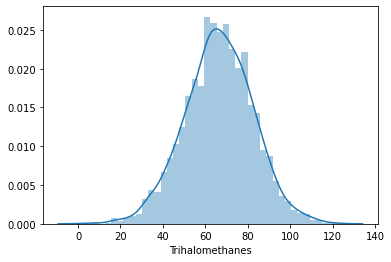

In [10]:
sns.distplot(data['Trihalomethanes'])

In [11]:
# By the above plots we can observe negligible outliers in the plots. So we can fill the null values with the mean value
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

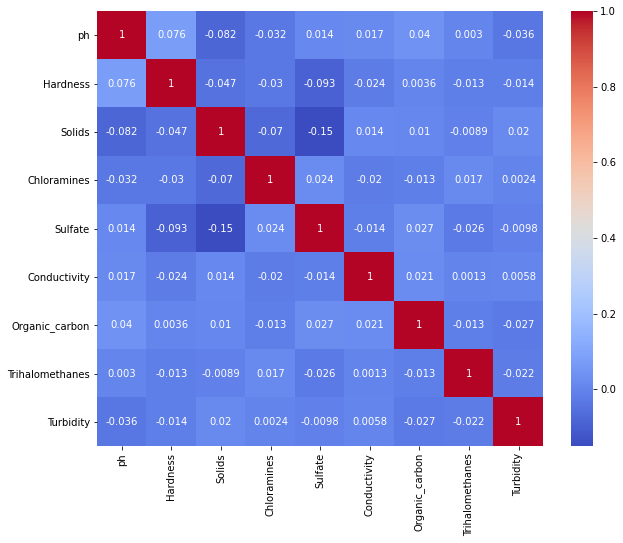

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop(columns='Potability').corr(),cmap='coolwarm',annot=True)

In [13]:
x = data.drop(columns=['Potability'])
y = data['Potability']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [14]:
params = {'criterion':['gini','entropy'],
          'min_samples_split': list(range(2,50))
         }

In [15]:
# tree = DecisionTreeClassifier(random_state=15)
# clf = GridSearchCV(tree,params,cv = 10, scoring='accuracy')
# clf.fit(x_train,y_train)
# print(clf.best_params_)
# print(clf.best_score_)

In [16]:
tree = DecisionTreeClassifier(random_state=15,criterion='gini',min_samples_split=30)
tree.fit(x_train,y_train)
print('Training score :',tree.score(x_train,y_train))
print("Test accuracy :",tree.score(x_test,y_test))

Training score : 0.8037505451373747
Test accuracy : 0.5879959308240081


#### Performance evaluation

In [17]:
y_predicted_dt = tree.predict(x_test)
y_probabilty_dt = tree.predict_proba(x_test)[:,1]

In [18]:
print(classification_report(y_test,y_predicted_dt))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       618
           1       0.45      0.51      0.48       365

    accuracy                           0.59       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.60      0.59      0.59       983



Text(33.0, 0.5, 'Actual')

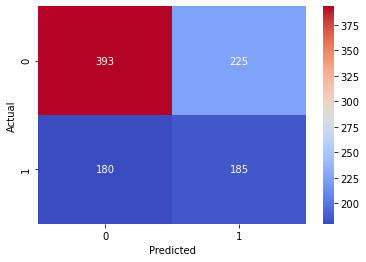

In [19]:
sns.heatmap(confusion_matrix(y_test,y_predicted_dt),cmap="coolwarm",annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [20]:
print('Model accuracy :',accuracy_score(y_test,y_predicted_dt))

Model accuracy : 0.5879959308240081


In [21]:
fpr_dt,tpr_dt,threshold_dt = roc_curve(y_test,y_probabilty_dt)
roc_auc_val_dt = auc(fpr_dt,tpr_dt)

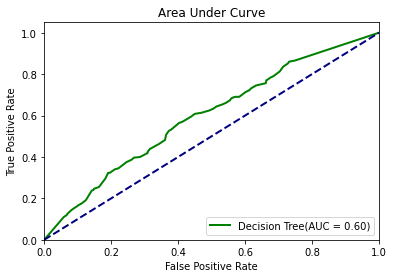

In [22]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_val_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
 param_dist = {
                'max_depth': [2, 3, 4,5,6],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
#               'n_estimators' :[300,350,400,450,500,550,600,650,700,750,800,850,900]
              'min_samples_split' : list(range(2,50,2))
             }

In [25]:
random_forest = RandomForestClassifier(random_state=15)
# gcv = GridSearchCV(random_forest,param_grid=param_dist,cv=10)
# gcv.fit(x_train,y_train)

In [26]:
# print('Best parameteres :',gcv.best_params_)
# print('Best Score :',gcv.best_score_)

### OOB Rate

In [27]:
# random_forest.set_params(warm_start=True,oob_score=True)

# error_rate = {}
# for i in range(15,1001):
#     random_forest.set_params(n_estimators=i)
#     random_forest.fit(x_train,y_train)
#     oob_error = 1-random_forest.oob_score_
#     error_rate[i]=oob_error

In [28]:
# oob_series = pd.Series(error_rate)

In [29]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# # plt.axhline(0.055, color='#875FDB',linestyle='--')
# # plt.axhline(0.05, color='#875FDB',linestyle='--')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [30]:
# As per OOB Plot we can see that after n = 300 the plot seems constant so we will use n = 300

In [31]:
random_forest = RandomForestClassifier(max_depth = 6,bootstrap=False,criterion='gini', random_state=15,n_estimators=300)
random_forest.fit(x_train,y_train)


RandomForestClassifier(bootstrap=False, max_depth=6, n_estimators=300,
                       random_state=15)

In [32]:
y_predicted_rf = random_forest.predict(x_test)
y_Proba_rf = random_forest.predict_proba(x_test)[:,1]

In [33]:
accuracy_score(y_test,y_predicted_rf)

0.6551373346897253

In [34]:

fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test,y_Proba_rf)
roc_auc_val_rf = auc(fpr_rf,tpr_rf)

In [35]:
roc_auc_val_rf

0.6428580928314935

In [36]:
print(classification_report(y_test,y_predicted_rf))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       618
           1       0.62      0.19      0.29       365

    accuracy                           0.66       983
   macro avg       0.64      0.56      0.53       983
weighted avg       0.64      0.66      0.59       983



Text(33.0, 0.5, 'Actual')

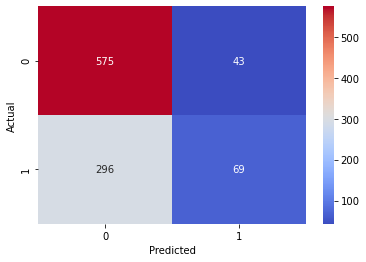

In [37]:
sns.heatmap(confusion_matrix(y_test,y_predicted_rf),cmap="coolwarm",annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

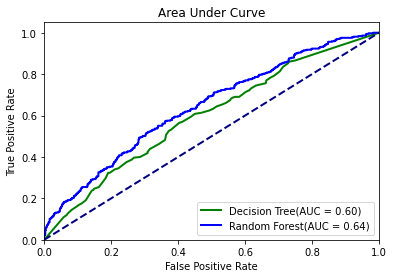

In [38]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_val_dt)
plt.plot(fpr_rf, tpr_rf, color='blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_val_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
Log_regression = LogisticRegression()
Log_regression.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_predicted_lr = Log_regression.predict(x_test)
y_prob_lr = Log_regression.predict_proba(x_test)[:,1]

In [42]:
accuracy_score(y_test,y_predicted_lr)

0.6286876907426246

In [43]:
print(classification_report(y_test,y_predicted_lr))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       618
           1       0.00      0.00      0.00       365

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.40      0.63      0.49       983



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'Actual')

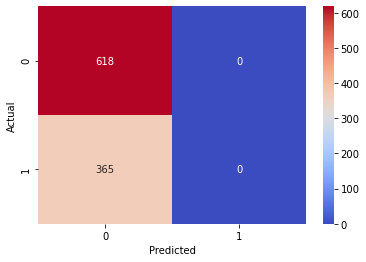

In [44]:
sns.heatmap(confusion_matrix(y_test,y_predicted_lr),cmap="coolwarm",annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [45]:
fpr_lr,tpr_lr,Threshold_lr = roc_curve(y_test,y_prob_lr)
auc_dt_lr = auc(fpr_lr,tpr_lr)
auc_dt_lr

0.5051159285365963

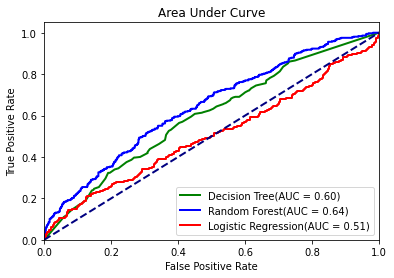

In [46]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_val_dt)
plt.plot(fpr_rf, tpr_rf, color='blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_val_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % auc_dt_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [49]:
# Finding out optimum value of N_neighbor

error = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train_std,y_train)
    pred_i = KNN.predict(x_test_std)
    error.append(np.mean(pred_i!=y_test))

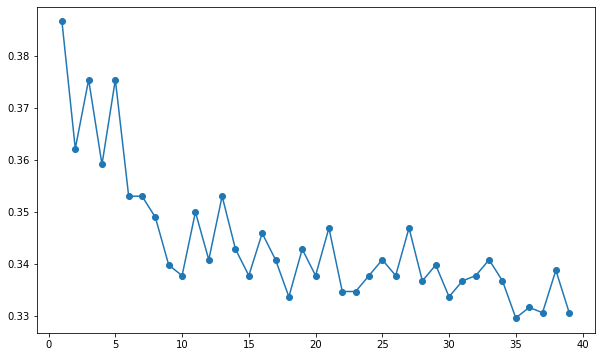

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,marker='o')

In [51]:
KNN.set_params(n_neighbors=18)

KNeighborsClassifier(n_neighbors=18)

In [52]:
KNN.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=18)

In [53]:
y_pred_KNN = KNN.predict(x_test_std)
y_prob_KNN = KNN.predict_proba(x_test_std)[:,1]

In [54]:
accuracy_score(y_test,y_pred_KNN)

0.6663275686673449

In [55]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       618
           1       0.65      0.22      0.33       365

    accuracy                           0.67       983
   macro avg       0.66      0.57      0.55       983
weighted avg       0.66      0.67      0.61       983



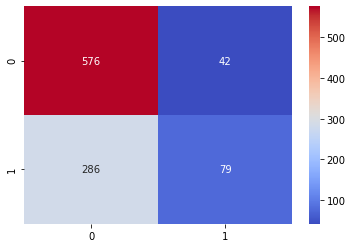

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred_KNN),annot=True,cmap='coolwarm',fmt='.0f')

In [57]:
fpr_knn,tpr_knn,threshold_knn = roc_curve(y_test,y_prob_KNN)
roc_auc_KNN = auc(fpr_knn,tpr_knn)
roc_auc_KNN

0.6511171698364144

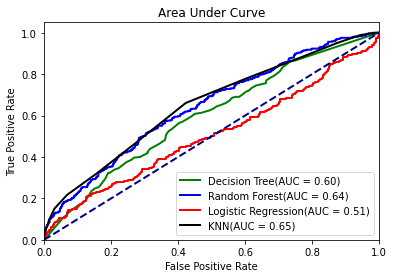

In [58]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_val_dt)
plt.plot(fpr_rf, tpr_rf, color='blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_val_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % auc_dt_lr)
plt.plot(fpr_knn, tpr_knn, color='black',
         lw=lw, label='KNN(AUC = %0.2f)' % roc_auc_KNN)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine (SVM)

In [59]:
from sklearn.svm import SVC

In [60]:
svm = SVC(C=0.01,kernel='rbf',gamma=0.01,random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test,y_test))

Training score : 0.6018316615787178
Test accuracy : 0.6286876907426246


In [61]:
svm = SVC(C=0.1,kernel='rbf',gamma=0.1,random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test,y_test))

Training score : 0.6153510684692542
Test accuracy : 0.6286876907426246


In [62]:
svm = SVC(C=0.1,kernel='poly',gamma=0.1,random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test,y_test))

Training score : 0.6149149585695596
Test accuracy : 0.3713123092573754


### Optimizing the HyperParameter C


In [104]:
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)
C_range=[i/10 for i in range(10,200)]
# acc_score_train=[]
# acc_score_test=[]
result = {}
c_val = []
for c in C_range:
    svc = SVC(C=c)
    svc.fit(x_train_std,y_train)
    train = svc.score(x_train_std,y_train)
    test = svc.score(x_test_std,y_test)    
    acc_score_train.append(train)
    acc_score_test.append(test)
    c_val.append(c)
    print(c,train,test)
    result[i] = [train,test]
print('Done') 

1.0 0.7361535106846926 0.6907426246185148
1.1 0.7383340601831662 0.688708036622584
1.2 0.7431312690798081 0.6897253306205493
1.3 0.744875708678587 0.6866734486266531
1.4 0.7457479284779764 0.6836215666327569
1.5 0.7492368076755342 0.6805696846388606
1.6 0.754470126471871 0.6795523906408952
1.7 0.7579590056694286 0.6805696846388606
1.8 0.7631923244657653 0.6805696846388606
1.9 0.7671173135630179 0.676500508646999
2.0 0.770170082860881 0.6754832146490336
2.1 0.773222852158744 0.6775178026449644
2.2 0.7754034016572177 0.6795523906408952
2.3 0.7754034016572177 0.6795523906408952
2.4 0.7771478412559966 0.6775178026449644
2.5 0.7793283907544701 0.6775178026449644
2.6 0.7819450501526385 0.6785350966429298
2.7 0.7828172699520279 0.6775178026449644
2.8 0.7832533798517226 0.6795523906408952
2.9 0.7832533798517226 0.6805696846388606
3.0 0.7849978194505015 0.6805696846388606
3.1 0.7849978194505015 0.6785350966429298
3.2 0.785870039249891 0.6775178026449644
3.3 0.7871783689489752 0.6775178026449644

In [108]:
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)
C_range=[i/100 for i in range(1,100)]
# acc_score_train=[]
# acc_score_test=[]
result = {}
c_val = []
for c in C_range:
    svc = SVC(C=c)
    svc.fit(x_train_std,y_train)
    train = svc.score(x_train_std,y_train)
    test = svc.score(x_test_std,y_test)    
    acc_score_train.append(train)
    acc_score_test.append(test)
    c_val.append(c)
    print(c,train,test)
#     result[i] = [train,test]
print('Done') 

0.01 0.6018316615787178 0.6286876907426246
0.02 0.6018316615787178 0.6286876907426246
0.03 0.6018316615787178 0.6286876907426246
0.04 0.6018316615787178 0.6286876907426246
0.05 0.6018316615787178 0.6286876907426246
0.06 0.6018316615787178 0.6286876907426246
0.07 0.6018316615787178 0.6286876907426246
0.08 0.6053205407762756 0.62970498474059
0.09 0.6083733100741386 0.6317395727365208
0.1 0.6144788486698648 0.6358087487283826
0.11 0.6184038377671173 0.6398779247202442
0.12 0.626689925861317 0.6408952187182095
0.13 0.636284343654601 0.6429298067141404
0.14 0.6436982119494112 0.6510681586978637
0.15 0.6463148713475796 0.6520854526958291
0.16 0.6493676406454426 0.6541200406917599
0.17 0.6502398604448321 0.6551373346897253
0.18 0.6546009594417793 0.6561546286876907
0.19 0.6580898386393371 0.6571719226856562
0.2 0.659834278238116 0.6622583926754833
0.21 0.6655037069341474 0.6653102746693794
0.22 0.667684256432621 0.6663275686673449
0.23 0.6711731356301788 0.669379450661241
0.24 0.6742259049280

In [109]:
# C Value of 0.21 looks fine.

In [110]:
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)
C_range=[i/10 for i in range(10,200)]
# acc_score_train=[]
# acc_score_test=[]
result = {}
c_val = []
for c in C_range:
    svc = SVC(gamma=c)
    svc.fit(x_train_std,y_train)
    train = svc.score(x_train_std,y_train)
    test = svc.score(x_test_std,y_test)    
    acc_score_train.append(train)
    acc_score_test.append(test)
    c_val.append(c)
    print(c,train,test)
    result[i] = [train,test]
print('Done') 

1.0 0.9816833842128216 0.6144455747711088
1.1 0.9882250327082425 0.6144455747711088
1.2 0.9895333624073267 0.6195320447609359
1.3 0.9925861317051897 0.6164801627670397
1.4 0.9943305713039686 0.6185147507629705
1.5 0.9965111208024422 0.6205493387589013
1.6 0.9982555604012211 0.6236012207527976
1.7 0.9986916703009159 0.624618514750763
1.8 0.9991277802006105 0.624618514750763
1.9 1.0 0.6276703967446592
2.0 1.0 0.6286876907426246
2.1 1.0 0.6286876907426246
2.2 1.0 0.6286876907426246
2.3 1.0 0.6276703967446592
2.4 1.0 0.6266531027466938
2.5 1.0 0.6266531027466938
2.6 1.0 0.6276703967446592
2.7 1.0 0.6276703967446592
2.8 1.0 0.6276703967446592
2.9 1.0 0.6276703967446592
3.0 1.0 0.6276703967446592
3.1 1.0 0.6276703967446592
3.2 1.0 0.6276703967446592
3.3 1.0 0.6276703967446592
3.4 1.0 0.6276703967446592
3.5 1.0 0.6276703967446592
3.6 1.0 0.6276703967446592
3.7 1.0 0.6276703967446592
3.8 1.0 0.6276703967446592
3.9 1.0 0.6276703967446592
4.0 1.0 0.6276703967446592
4.1 1.0 0.6276703967446592
4.2

In [111]:
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)
C_range=[i/100 for i in range(1,100)]
# acc_score_train=[]
# acc_score_test=[]
result = {}
c_val = []
for c in C_range:
    svc = SVC(C=c)
    svc.fit(x_train_std,y_train)
    train = svc.score(x_train_std,y_train)
    test = svc.score(x_test_std,y_test)    
    acc_score_train.append(train)
    acc_score_test.append(test)
    c_val.append(c)
    print(c,train,test)
#     result[i] = [train,test]
print('Done') 

0.01 0.6018316615787178 0.6286876907426246
0.02 0.6018316615787178 0.6286876907426246
0.03 0.6018316615787178 0.6286876907426246
0.04 0.6018316615787178 0.6286876907426246
0.05 0.6018316615787178 0.6286876907426246
0.06 0.6018316615787178 0.6286876907426246
0.07 0.6018316615787178 0.6286876907426246
0.08 0.6053205407762756 0.62970498474059
0.09 0.6083733100741386 0.6317395727365208
0.1 0.6144788486698648 0.6358087487283826
0.11 0.6184038377671173 0.6398779247202442
0.12 0.626689925861317 0.6408952187182095
0.13 0.636284343654601 0.6429298067141404
0.14 0.6436982119494112 0.6510681586978637
0.15 0.6463148713475796 0.6520854526958291
0.16 0.6493676406454426 0.6541200406917599
0.17 0.6502398604448321 0.6551373346897253
0.18 0.6546009594417793 0.6561546286876907
0.19 0.6580898386393371 0.6571719226856562
0.2 0.659834278238116 0.6622583926754833
0.21 0.6655037069341474 0.6653102746693794
0.22 0.667684256432621 0.6663275686673449
0.23 0.6711731356301788 0.669379450661241
0.24 0.6742259049280

In [112]:
# gamma = 0.18

In [115]:
svm = SVC(C=0.21,gamma=0.18,kernel='rbf',random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test_std,y_test))

Training score : 0.6585259485390318
Test accuracy : 0.6531027466937945


In [116]:
svm = SVC(C=0.21,gamma=0.18,kernel='poly',random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test_std,y_test))

Training score : 0.644134321849106
Test accuracy : 0.6358087487283826


In [117]:
svm = SVC(C=0.21,gamma=0.18,kernel='linear',random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test_std,y_test))

Training score : 0.6018316615787178
Test accuracy : 0.6286876907426246


In [118]:
svm = SVC(C=0.21,gamma=0.18,kernel='sigmoid',random_state=42)
svm.fit(x_train_std,y_train)
print('Training score :',svm.score(x_train_std,y_train))
print("Test accuracy :",svm.score(x_test_std,y_test))

Training score : 0.5098124727431312
Test accuracy : 0.5635808748728383


In [121]:
#Kernel = rbf looks fine

In [125]:
svm = SVC(C=0.21,gamma=0.18,kernel='rbf',random_state=42,probability=True)
svm.fit(x_train_std,y_train)


SVC(C=0.21, gamma=0.18, probability=True, random_state=42)

In [128]:
y_pred_svm = svm.predict(x_test_std)
y_prob_svm = svm.predict_proba(x_test_std)[:,1]

In [130]:
accuracy_score(y_test,y_pred_svm)

0.6531027466937945

In [132]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       618
           1       0.73      0.10      0.18       365

    accuracy                           0.65       983
   macro avg       0.69      0.54      0.48       983
weighted avg       0.68      0.65      0.56       983



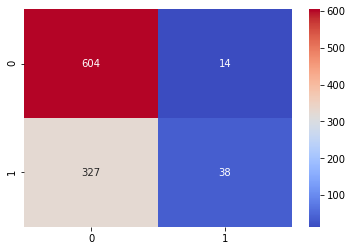

In [133]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,cmap='coolwarm',fmt='.0f')

In [134]:
fpr_svm,tpr_svm,threshold_svm = roc_curve(y_test,y_prob_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)
roc_auc_svm

0.6821119829764597

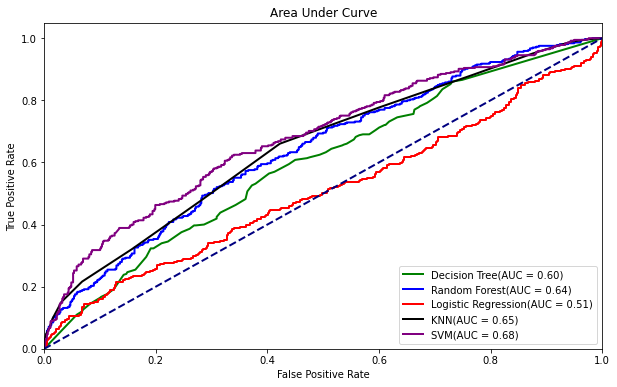

In [136]:
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_val_dt)
plt.plot(fpr_rf, tpr_rf, color='blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_val_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % auc_dt_lr)
plt.plot(fpr_knn, tpr_knn, color='black',
         lw=lw, label='KNN(AUC = %0.2f)' % roc_auc_KNN)
plt.plot(fpr_svm, tpr_svm, color='purple',
         lw=lw, label='SVM(AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()